Домашнее задание 08: Важность функций
Пожалуйста, заполните строки кода ниже. Ваша цель — оценить важность существующих функций несколькими методами.

Ваша главная цель — оценить важность функций для логистической регрессии и повышения градиента, используя несколько методов.

Модель следует обучать, используя только часть данных.

В этом задании вы встретите [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29) описываем разные автомобили для задачи мультиклассовой ($k=4$) классификации, но мы используем только двоичное подмножество для классов `bus` и `opel`. Данные доступны ниже.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_basic/homeworks/lab01_ml_pipeline/car_data.csv

In [ ]:
!pip install shap

In [274]:
import pandas as pd
import numpy as np
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

from matplotlib import pyplot as plt


dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
binary_subset = np.array([x in ['bus', 'opel'] for x in target])
data, target = data[binary_subset], target[binary_subset]

print(data.shape, target.shape)

(430, 19) (430,)


In [275]:
# do not change the code in the block below
# __________start of block__________
submission_dict = {}
# __________end of block__________

In [276]:
X_train, y_train = data[:350, 1:], target[:350]
X_val, y_val = data[350:, 1:], target[350:]
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(350, 18) (350,) (80, 18) (80,)


#### Оценка важности функций с использованием коэффициентов логистической регрессии.
Обучите базовую логистическую регрессию и сохраните ее коэффициенты (веса).

In [277]:
lr_basic = LogisticRegression(max_iter=10000)

lr_basic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Проверьте результаты классификации на исходных данных поезда:

In [278]:
print(classification_report(y_train, lr_basic.predict(X_train)))

              precision    recall  f1-score   support

         bus       0.99      0.99      0.99       175
        opel       0.99      0.99      0.99       175

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



And on validation:

In [279]:
print(classification_report(y_val, lr_basic.predict(X_val)))

              precision    recall  f1-score   support

         bus       1.00      0.95      0.98        43
        opel       0.95      1.00      0.97        37

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



Найдите веса логистической регрессии и сохраните их в переменной lr_basic_coef:

In [280]:
lr_basic_coef = lr_basic.coef_

It should have the same number of coefficients as number of features.

In [281]:
assert lr_basic_coef.shape[-1] == X_train.shape[1]

In [282]:
# do not change the code in the block below
# __________start of block__________
submission_dict['lr_basic_coef'] = lr_basic_coef
# __________end of block__________

#### Оценка важности функций с использованием коэффициентов логистической регрессии.
Обучите базовую логистическую регрессию на масштабированных данных и сохраните ее коэффициенты (веса).

In [283]:
lr_scaled = LogisticRegression(max_iter=10000)

Use `StandardScaler` on your data.

In [284]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [285]:
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

Check the classification results on the scaled train data:

In [286]:
print(classification_report(y_train, lr_scaled.predict(X_train_scaled)))

              precision    recall  f1-score   support

         bus       0.96      0.97      0.97       175
        opel       0.97      0.96      0.97       175

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350



And on validation:

In [287]:
print(classification_report(y_val, lr_scaled.predict(X_val_scaled)))

              precision    recall  f1-score   support

         bus       0.98      0.98      0.98        43
        opel       0.97      0.97      0.97        37

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



Сохраните коэффициенты модели в переменную lr_scaled_coef:

In [288]:
lr_scaled_coef = lr_scaled.coef_

It should also have the same number of coefficients as number of features.

In [289]:
assert lr_scaled_coef.shape[-1] == X_train_scaled.shape[1]

Сохраните индекс наиболее важной функции для lr_scaled в переменную lr_scaled_most_important_index:

In [290]:
lr_scaled_most_important_index = lr_scaled_coef.argmax()

In [291]:
# do not change the code in the block below
# __________start of block__________
assert isinstance(int(lr_scaled_most_important_index), int)
submission_dict['lr_scaled_coef'] = lr_scaled_coef
submission_dict['lr_scaled_most_important_index'] = lr_scaled_most_important_index
# __________end of block__________

#### Оценка важности функций для логистической регрессии с использованием shap
Используйте [`shap` библиотеку](https://shap.readthedocs.io/en/latest/index.html), чтобы проверить важность функций. Используйте [`Linear` объяснитель](https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html) и масштабированные данные.

In [294]:
explainer = shap.explainers.LinearExplainer(lr_scaled, X_train_scaled)
shap_values_scaled = explainer(X_train_scaled)

Summary plot:

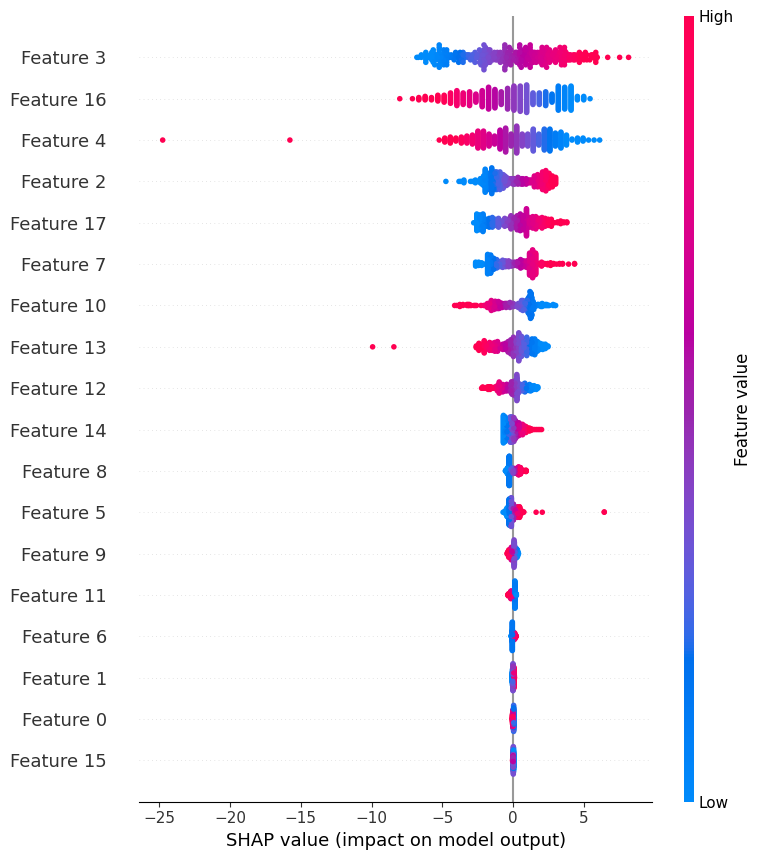

In [295]:
shap.summary_plot(shap_values_scaled, X_train_scaled)

Наконец, напишите функцию, которая преобразует значения формы в коэффициенты логистической регрессии. Их отношения описаны в [документации](https://shap.readthedocs.io/en/latest/generated/shap.explainers.Linear.html).

*Примечание: основной целью этого задания является более глубокое понимание процесса оценки важности фигуры.*:


In [355]:
shap_values_scaled[0]

.values =
array([ 3.02582019e-02, -1.36954255e-02, -1.51801208e+00,  3.19614643e+00,
       -1.57746785e+01,  6.42811220e+00, -6.69965904e-02,  1.36715304e+00,
       -2.79301907e-01,  6.73751329e-02, -2.00448699e+00,  1.18220820e-01,
       -1.80198030e-01, -9.93269588e+00,  4.09069554e-01,  2.95275114e-03,
        3.63364257e+00, -2.35618918e+00])

.base_values =
-0.09332502597234385

.data =
array([-0.94107241, -0.29155968, -0.82633097,  1.00844538,  5.5232747 ,
       11.01525571, -0.79931192,  0.81828541, -0.76645325, -0.33090432,
        1.46779511, -0.82304696,  0.23770664,  7.02170242,  0.76293217,
       -0.15908488, -1.28724874, -1.47506101])

In [371]:
def get_coef_from_shap_values(shap_values, X_train_scaled):
    coef = np.mean(shap_values.values, axis = 0) - np.mean(shap_values.base_values, axis = 0)
    features_means = X_train_scaled.mean(axis=0)
    coef += features_means*coef
    return coef/np.mean(X_train_scaled, axis=0)

In [372]:
coef_from_shap = get_coef_from_shap_values(shap_values_scaled, X_train_scaled)

In [373]:
coef_from_shap

array([ 6.16076160e+14, -2.10641440e+14, -1.22269175e+14,  2.37382305e+14,
       -7.00459043e+14, -9.06653271e+14, -2.84399968e+14,  3.07891095e+15,
       -1.65405894e+14,  7.65996551e+14,  5.12001394e+14, -8.91412794e+14,
       -2.59442684e+15,  1.35441934e+15,  1.13556672e+15, -4.23042586e+15,
       -1.57423115e+14,  9.84712377e+13])

In [353]:
lr_scaled_coef

array([[-0.0308141 ,  0.04038916,  1.76464104,  3.35720044, -2.88170181,
         0.5835645 ,  0.07879649,  1.52222547,  0.34803312, -0.18384689,
        -1.41802344, -0.13678338, -0.87872259, -1.42396471,  0.53480476,
        -0.01473084, -2.93765859,  1.65556713]])

If everything is correct, the next assert should pass.

In [265]:
assert np.allclose(coef_from_shap, lr_scaled_coef)

AssertionError: ignored

#### Training the GradientBoosting

In [318]:
gb_basic = GradientBoostingClassifier(n_estimators=10)
gb_basic.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [319]:
gb_basic_feature_importances = gb_basic.feature_importances_

In [320]:
gb_basic.feature_importances_

array([0.        , 0.02340601, 0.17233539, 0.        , 0.0988627 ,
       0.40416886, 0.0061418 , 0.01280729, 0.        , 0.09165068,
       0.06169492, 0.00382836, 0.00234829, 0.04798893, 0.06779904,
       0.00696772, 0.        , 0.        ])

In [321]:
gb_scaled = GradientBoostingClassifier(n_estimators=10)
gb_scaled.fit(X_train_scaled, y_train)

GradientBoostingClassifier(n_estimators=10)

In [322]:
gb_scaled_feature_importances = gb_scaled.feature_importances_

In [323]:
# do not change the code in the block below
# __________start of block__________
assert np.allclose(gb_basic_feature_importances, gb_scaled_feature_importances, atol=1e-1)
submission_dict['gb_basic_feature_importances'] = gb_basic_feature_importances
# __________end of block__________

**Question:** Why are the feature importances so similar for scaled and unscaled data?

#### Using shap to explain trees ensemble solution

In [324]:
explainer = shap.TreeExplainer(gb_scaled)
shap_values = explainer.shap_values(X_train)

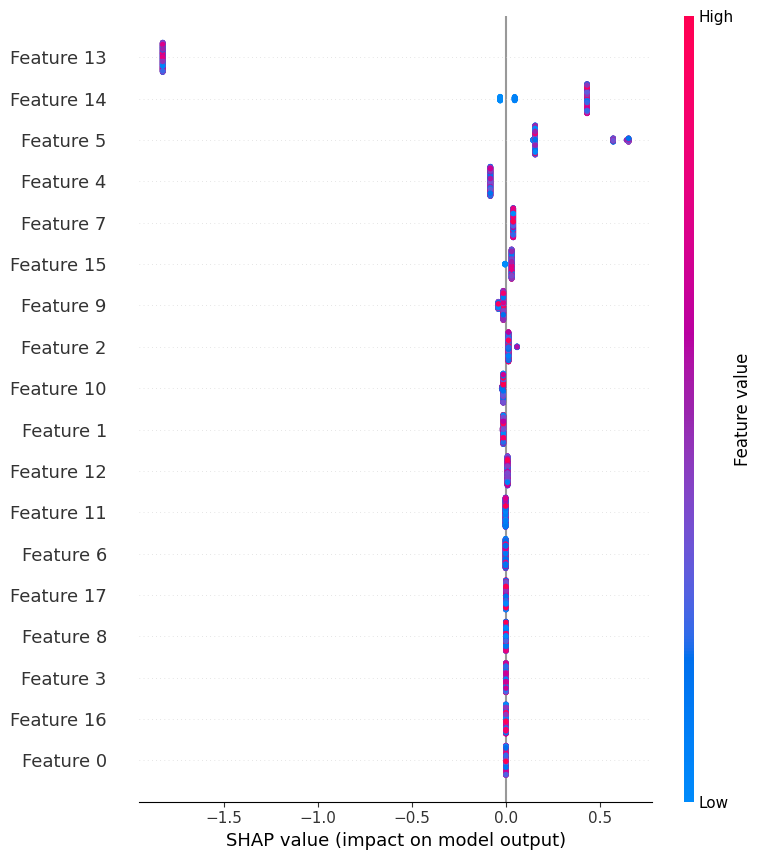

In [325]:
shap.summary_plot(shap_values, X_train)

In [329]:
gb_scaled_most_important_index = gb_scaled.feature_importances_.argmax()

In [330]:
gb_scaled_most_important_index

5

In [331]:
# do not change the code in the block below
# __________start of block__________
assert isinstance(int(gb_scaled_most_important_index), int)
submission_dict['gb_scaled_most_important_index'] = gb_scaled_most_important_index
# __________end of block__________

In [332]:
# do not change the code in the block below
# __________start of block__________
np.save('submission_dict_hw08.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw.npy`')
# __________end of block__________

File saved to `submission_dict_hw.npy`


Great job! Please, submit your solution to the grading system! Please, note, you need to submit both `submission_dict_hw.npy` and `get_coef_from_shap_values` function code.